In [1]:
#보스턴 주택 데이터셋
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [2]:
# 데이터프레임
feature_df = pd.DataFrame(boston.data, columns=boston['feature_names'])
target = boston['target']

In [3]:
# 보스턴 집값 설명
# 1. CRIM : 범죄율
# 2. INDUS : 비소매상업지역 면적 비율
# 3. NOX : 일산화질소 농도
# 4. RM : 주택당 방 수
# 5. LSTAT : 인구 중 하위 계층 비율
# 6. B : 인구 중 흑인 비율
# 7. PTRATION : 학생/교사 비율
# 8. ZN : 25,000 평방피트를 초과 거주지역 비율
# 9. CHAS : 찰스 강의 경계 위치 유무 (더미변수) 1-경계위치, 0-경계에 위치하지 않음
# 10. AGE : 1940이전에 건축된 주택의 비율
# 11. RAD : 방사형 고속도로 까지 거리
# 12. DIS : 직업센터의 거리
# 13. TAX : 제산세율
feature_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [4]:
col_names = list(feature_df.columns)
idx = col_names.index('CHAS')

In [5]:
from sklearn.preprocessing import StandardScaler
# 더미변수는 제외하고 정규화를 수행합니다.
feature_no_dummy_df = feature_df.drop(feature_df.columns[idx], axis = 1)
scaler = StandardScaler()
scaled_featrue = scaler.fit_transform(feature_no_dummy_df)

In [6]:
featrue_names = list(feature_no_dummy_df.columns)

In [7]:
feature_scaled_df = pd.DataFrame(scaled_featrue, columns=featrue_names)

In [8]:
feature_scaled_df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0   -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1   -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2   -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3   -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4   -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738  0.158124  0.439316  0.018673 -0.625796   
502 -0.415249 -0.487722  0.115738  0.158124 -0.234548  0.288933 -0.716639   
503 -0.413447 -0.487722  0.115738  0.158124  0.984960  0.797449 -0.773684   
504 -0.407764 -0.487722  0.115738  0.158124  0.725672  0.736996 -0.668437   
505 -0.415000 -0.487722  0.115738  0.158124 -0.362767  0.434732 -0.613246   

          RAD       TAX   PTRATIO         B     LSTAT  
0   -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1   -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2   -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3   -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4   -0.752922 -1.106115  0.113032  0.441052 -1.026501  
..        ...       ...       ...       ...       ...  
501 -0.982843 -0.803212  1.176466  0.387217 -0.418147  
502 -0.982843 -0.803212  1.176466  0.441052 -0.500850  
503 -0.982843 -0.803212  1.176466  0.441052 -0.983048  
504 -0.982843 -0.803212  1.176466  0.403225 -0.865302  
505 -0.982843 -0.803212  1.176466  0.441052 -0.669058  

[506 rows x 12 columns]

In [9]:
# 더미변수 데이터프레임 붙이기
feature_scaled_boston_df = pd.concat([feature_scaled_df, feature_df.CHAS], axis = 1)

In [10]:
feature_scaled_boston_df

CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0   -0.419782  0.284830 -1.287909 -0.144217  0.413672 -0.120013  0.140214   
1   -0.417339 -0.487722 -0.593381 -0.740262  0.194274  0.367166  0.557160   
2   -0.417342 -0.487722 -0.593381 -0.740262  1.282714 -0.265812  0.557160   
3   -0.416750 -0.487722 -1.306878 -0.835284  1.016303 -0.809889  1.077737   
4   -0.412482 -0.487722 -1.306878 -0.835284  1.228577 -0.511180  1.077737   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738  0.158124  0.439316  0.018673 -0.625796   
502 -0.415249 -0.487722  0.115738  0.158124 -0.234548  0.288933 -0.716639   
503 -0.413447 -0.487722  0.115738  0.158124  0.984960  0.797449 -0.773684   
504 -0.407764 -0.487722  0.115738  0.158124  0.725672  0.736996 -0.668437   
505 -0.415000 -0.487722  0.115738  0.158124 -0.362767  0.434732 -0.613246   

          RAD       TAX   PTRATIO         B     LSTAT  CHAS  
0   -0.982843 -0.666608 -1.459000  0.441052 -1.075562   0.0  
1   -0.867883 -0.987329 -0.303094  0.441052 -0.492439   0.0  
2   -0.867883 -0.987329 -0.303094  0.396427 -1.208727   0.0  
3   -0.752922 -1.106115  0.113032  0.416163 -1.361517   0.0  
4   -0.752922 -1.106115  0.113032  0.441052 -1.026501   0.0  
..        ...       ...       ...       ...       ...   ...  
501 -0.982843 -0.803212  1.176466  0.387217 -0.418147   0.0  
502 -0.982843 -0.803212  1.176466  0.441052 -0.500850   0.0  
503 -0.982843 -0.803212  1.176466  0.441052 -0.983048   0.0  
504 -0.982843 -0.803212  1.176466  0.403225 -0.865302   0.0  
505 -0.982843 -0.803212  1.176466  0.441052 -0.669058   0.0  

[506 rows x 13 columns]

In [11]:
## 더미변수 외 정규화를 하였으며 전처리 완료

In [12]:
# 리지 회귀
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(feature_scaled_boston_df, target)
    data.append(pd.Series(np.hstack([lasso.coef_, lasso.intercept_])))

df_lasso = pd.DataFrame(data, index=alpha).T

lasso_names = list(feature_scaled_boston_df.columns)
lasso_names.append('intercept')

df_lasso.index = lasso_names
df_lasso

0.001      0.010      0.100      1.000      10.000
CRIM       -0.925553  -0.902291  -0.654375  -0.000000  -0.000000
ZN          1.076808   1.036319   0.707622   0.000000   0.000000
INDUS       0.132102   0.053213  -0.000000  -0.000000  -0.000000
NOX        -2.048135  -1.977564  -1.527243  -0.000000  -0.000000
RM          2.676082   2.689074   2.839852   2.713352   0.000000
AGE         0.015323   0.000000  -0.000000  -0.000000  -0.000000
DIS        -3.100393  -3.060157  -2.454304  -0.000000   0.000000
RAD         2.644740   2.490548   1.259171  -0.000000  -0.000000
TAX        -2.059968  -1.910430  -0.915105  -0.000000  -0.000000
PTRATIO    -2.058647  -2.042318  -1.953708  -1.343548  -0.000000
B           0.848596   0.841655   0.780235   0.180954   0.000000
LSTAT      -3.741826  -3.733073  -3.743954  -3.543384  -0.000000
CHAS        2.675544   2.572063   1.363211   0.000000   0.000000
intercept  22.347739  22.354897  22.438513  22.532806  22.532806

In [13]:
## 베이지안 회귀
import pymc3 as pm

In [14]:
beta_names = list(feature_scaled_boston_df.columns)

In [15]:
# 사전 분포 확률이 pm.Laplace(beta, mu=0, b=1) 일 때
burnin, num_samples = 3000, 10000
with pm.Model() as model:
    betas = [pm.Laplace(beta, mu=0, b=1) for beta in beta_names]
    # x1 = pm.Normal('x1', mu=0, tau=1)
    
    intercept = pm.Laplace('intercept', mu=0, b=1)
    # prior on Normal/T error variance. Gamma(1,1) has mean=1, variance=1
    
    tau = pm.Gamma('tau', 1, 1)
    # Likelihood
    # mu ~ beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3
    mu = intercept + sum(betas[n]*feature_scaled_boston_df.values[:,n] for n in range(len(betas)))
    
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau, observed=target)
    
    # Sample
    start = pm.find_MAP()
    print("starting trace at MAP:", start)
    step = pm.NUTS()
    trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]


starting trace at MAP: {'CRIM': array(-0.81147351), 'ZN': array(0.91176541), 'INDUS': array(-5.22571357e-06), 'NOX': array(-1.80320193), 'RM': array(2.74168014), 'AGE': array(-1.88473929e-07), 'DIS': array(-2.84269056), 'RAD': array(2.02715922), 'TAX': array(-1.52302316), 'PTRATIO': array(-2.00777999), 'B': array(0.81815072), 'LSTAT': array(-3.73512343), 'CHAS': array(2.15497176), 'intercept': array(22.33916258), 'tau_log__': array(-3.09150368), 'tau': array(0.04543359)}


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_60413/4163607520.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, intercept, CHAS, LSTAT, B, PTRATIO, TAX, RAD, DIS, AGE, RM, NOX, INDUS, ZN, CRIM]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 59 seconds.


In [16]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
CRIM       -0.810  0.282  -1.328   -0.275      0.001    0.001   39516.0   
ZN          0.900  0.320   0.301    1.502      0.002    0.001   33899.0   
INDUS      -0.050  0.358  -0.739    0.634      0.002    0.002   35986.0   
NOX        -1.775  0.434  -2.581   -0.961      0.002    0.002   35468.0   
RM          2.743  0.294   2.214    3.316      0.002    0.001   31987.0   
AGE        -0.024  0.323  -0.668    0.568      0.002    0.002   31996.0   
DIS        -2.852  0.413  -3.622   -2.076      0.002    0.002   34619.0   
RAD         1.982  0.569   0.914    3.066      0.003    0.002   27676.0   
TAX        -1.470  0.612  -2.658   -0.358      0.004    0.003   28450.0   
PTRATIO    -1.999  0.285  -2.554   -1.483      0.002    0.001   33958.0   
B           0.817  0.246   0.351    1.265      0.001    0.001   39304.0   
LSTAT      -3.723  0.357  -4.394   -3.046      0.002    0.001   31331.0   
CHAS        2.183  0.857   0.533    3.746      0.004    0.003   38698.0   
intercept  22.335  0.218  21.928   22.746      0.001    0.001   40435.0   
tau         0.044  0.003   0.039    0.050      0.000    0.000   39960.0   

           ess_tail  r_hat  
CRIM        22083.0    1.0  
ZN          22430.0    1.0  
INDUS       20495.0    1.0  
NOX         20889.0    1.0  
RM          22537.0    1.0  
AGE         20155.0    1.0  
DIS         22144.0    1.0  
RAD         21213.0    1.0  
TAX         20491.0    1.0  
PTRATIO     21534.0    1.0  
B           20470.0    1.0  
LSTAT       22708.0    1.0  
CHAS        21535.0    1.0  
intercept   21209.0    1.0  
tau         20446.0    1.0

In [17]:
## 결과 값을 저장합니다.
bayesian_laplace_b1_df = pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_60413/851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


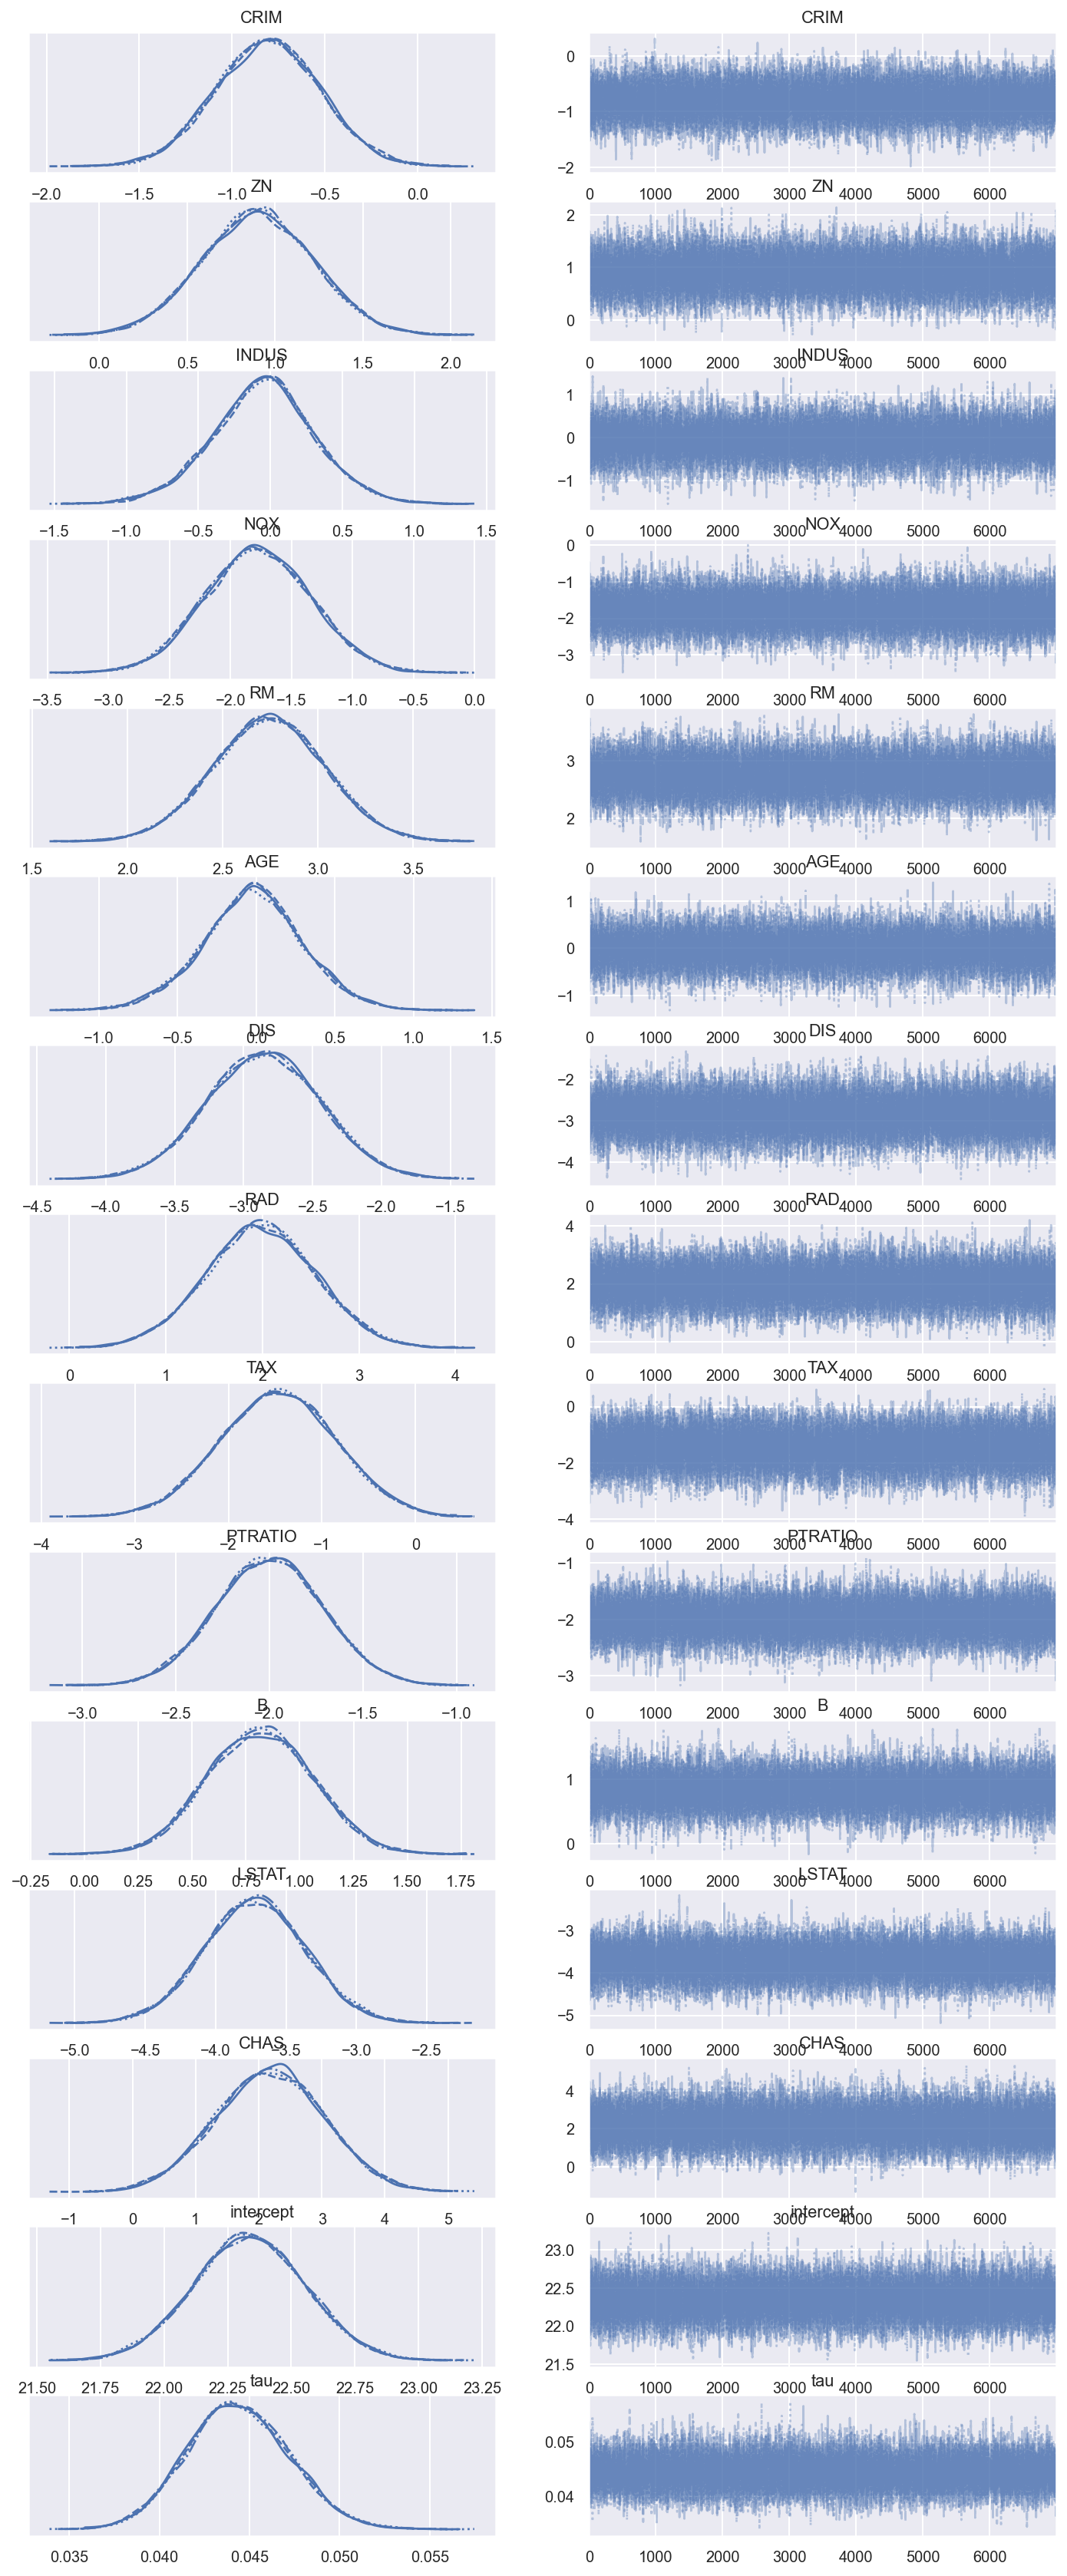

In [18]:
pm.traceplot(trace)
plt.show()

In [19]:
# 사전 분포 확률이 pm.Laplace(beta, mu=0, b=100) 일 때
burnin, num_samples = 3000, 10000
with pm.Model() as model:
    betas = [pm.Laplace(beta, mu=0, b=100) for beta in beta_names]
    # x1 = pm.Normal('x1', mu=0, tau=1)
    
    intercept = pm.Laplace('intercept', mu=0, b=1)
    # prior on Normal/T error variance. Gamma(1,1) has mean=1, variance=1
    
    tau = pm.Gamma('tau', 1, 1)
    # Likelihood
    # mu ~ beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3
    mu = intercept + sum(betas[n]*feature_scaled_boston_df.values[:,n] for n in range(len(betas)))
    
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau, observed=target)
    
    # Sample
    start = pm.find_MAP()
    print("starting trace at MAP:", start)
    step = pm.NUTS()
    trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]


starting trace at MAP: {'CRIM': array(-0.92617), 'ZN': array(1.07945494), 'INDUS': array(0.13501156), 'NOX': array(-2.05402516), 'RM': array(2.67433554), 'AGE': array(0.01673953), 'DIS': array(-3.10224701), 'RAD': array(2.65137969), 'TAX': array(-2.06565037), 'PTRATIO': array(-2.05821513), 'B': array(0.84822255), 'LSTAT': array(-3.74190643), 'CHAS': array(2.73183285), 'intercept': array(22.30053944), 'tau_log__': array(-3.08652483), 'tau': array(0.04566036)}


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_60413/3498528191.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, intercept, CHAS, LSTAT, B, PTRATIO, TAX, RAD, DIS, AGE, RM, NOX, INDUS, ZN, CRIM]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 112 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7017065764434407, but should be close to 0.8. Try to increase the number of tuning steps.


In [20]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
CRIM       -0.928  0.282  -1.469   -0.405      0.002    0.001   31670.0   
ZN          1.081  0.320   0.494    1.695      0.002    0.001   26466.0   
INDUS       0.138  0.423  -0.664    0.924      0.003    0.002   28120.0   
NOX        -2.056  0.442  -2.911   -1.266      0.003    0.002   25991.0   
RM          2.675  0.296   2.102    3.210      0.002    0.001   24530.0   
AGE         0.020  0.375  -0.668    0.739      0.002    0.002   28621.0   
DIS        -3.100  0.416  -3.848   -2.292      0.003    0.002   25712.0   
RAD         2.653  0.577   1.605    3.784      0.004    0.003   25069.0   
TAX        -2.068  0.638  -3.276   -0.884      0.004    0.003   25189.0   
PTRATIO    -2.062  0.285  -2.585   -1.522      0.002    0.001   25722.0   
B           0.848  0.242   0.380    1.287      0.001    0.001   32605.0   
LSTAT      -3.739  0.365  -4.418   -3.047      0.002    0.002   25059.0   
CHAS        2.726  0.850   1.076    4.298      0.005    0.004   28454.0   
intercept  22.301  0.219  21.893   22.712      0.001    0.001   32879.0   
tau         0.045  0.003   0.039    0.050      0.000    0.000   24373.0   

           ess_tail  r_hat  
CRIM        19225.0    1.0  
ZN          18982.0    1.0  
INDUS       20744.0    1.0  
NOX         19240.0    1.0  
RM          19765.0    1.0  
AGE         20274.0    1.0  
DIS         16730.0    1.0  
RAD         19632.0    1.0  
TAX         18148.0    1.0  
PTRATIO     18591.0    1.0  
B           19306.0    1.0  
LSTAT       18067.0    1.0  
CHAS        17197.0    1.0  
intercept   18012.0    1.0  
tau         12541.0    1.0

In [21]:
## 결과 값을 저장합니다.
bayesian_laplace_b100_df = pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_60413/851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


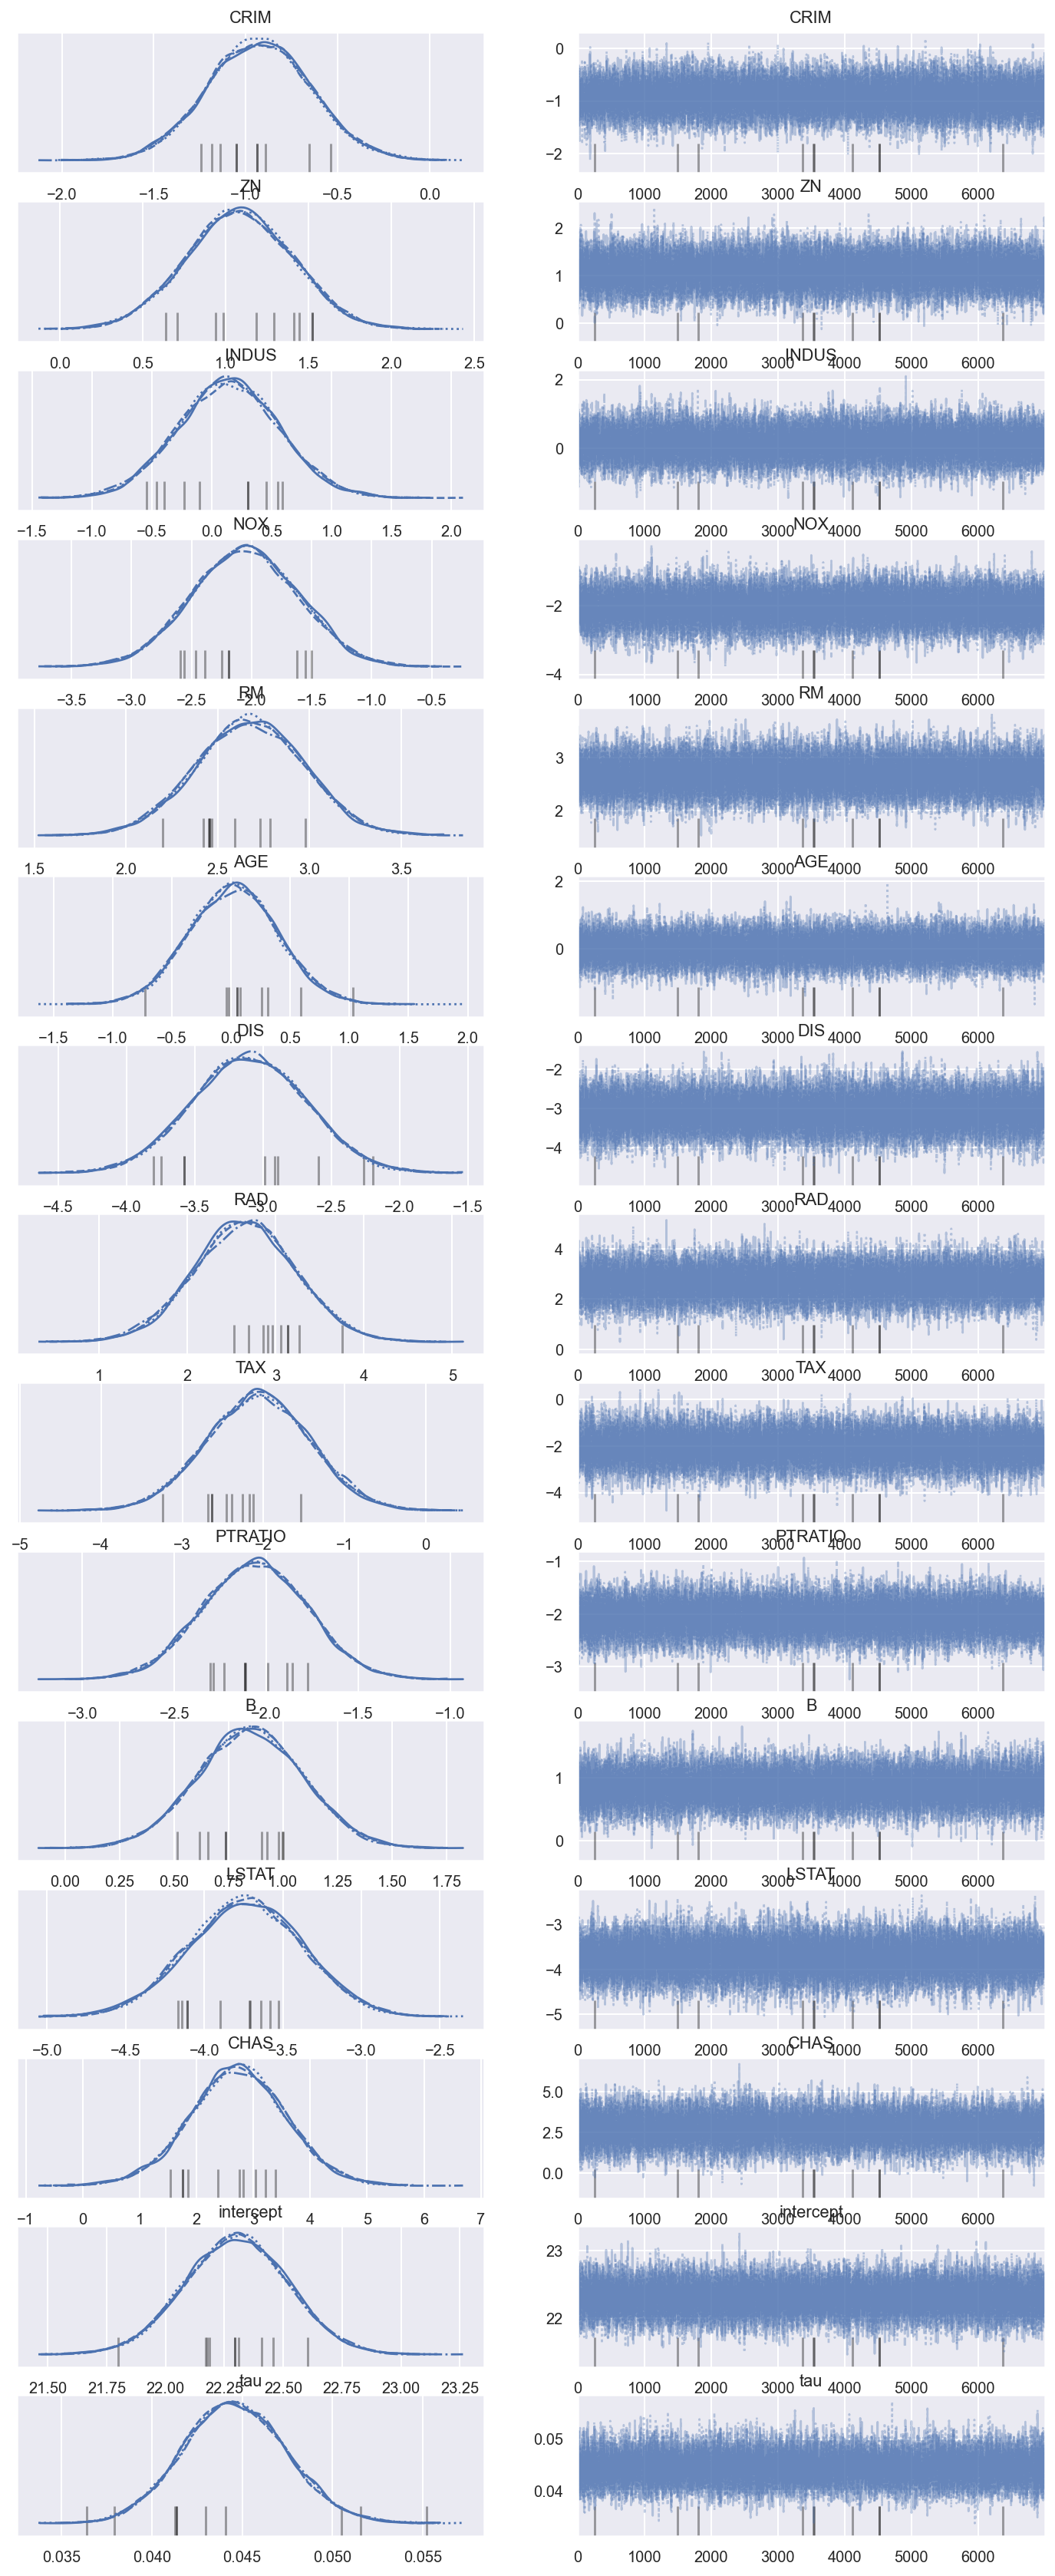

In [22]:
pm.traceplot(trace)
plt.show()

In [23]:
# 사전 분포 확률이 pm.Laplace(beta, mu=0, b=0.001) 일 때
burnin, num_samples = 3000, 10000
with pm.Model() as model:
    betas = [pm.Laplace(beta, mu=0, b=0.001) for beta in beta_names]
    # x1 = pm.Normal('x1', mu=0, tau=1)
    
    intercept = pm.Laplace('intercept', mu=0, b=1)
    # prior on Normal/T error variance. Gamma(1,1) has mean=1, variance=1
    
    tau = pm.Gamma('tau', 1, 1)
    # Likelihood
    # mu ~ beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3
    mu = intercept + sum(betas[n]*feature_scaled_boston_df.values[:,n] for n in range(len(betas)))
    
    y_obs = pm.Normal('y_obs', mu=mu, tau=tau, observed=target)
    
    # Sample
    start = pm.find_MAP()
    print("starting trace at MAP:", start)
    step = pm.NUTS()
    trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]


starting trace at MAP: {'CRIM': array(2.37285003e-09), 'ZN': array(2.49536321e-09), 'INDUS': array(-1.13798271e-09), 'NOX': array(3.19349082e-09), 'RM': array(-1.06112243e-09), 'AGE': array(-5.60462119e-10), 'DIS': array(-2.3237719e-09), 'RAD': array(1.31203985e-09), 'TAX': array(-1.83463017e-09), 'PTRATIO': array(4.42489305e-10), 'B': array(1.66700296e-09), 'LSTAT': array(2.81949313e-09), 'CHAS': array(-3.03409861e-10), 'intercept': array(0.50178152), 'tau_log__': array(-6.25491499), 'tau': array(0.00192099)}


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_60413/2831068728.py:21: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(num_samples, step, start, progressbar=True)[burnin: ]
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, intercept, CHAS, LSTAT, B, PTRATIO, TAX, RAD, DIS, AGE, RM, NOX, INDUS, ZN, CRIM]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 128 seconds.


In [24]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
CRIM       -0.000  0.001  -0.003    0.003      0.000    0.000   21036.0   
ZN          0.000  0.001  -0.003    0.003      0.000    0.000   16809.0   
INDUS      -0.000  0.001  -0.003    0.003      0.000    0.000   18345.0   
NOX        -0.000  0.001  -0.003    0.003      0.000    0.000   16137.0   
RM          0.000  0.001  -0.003    0.003      0.000    0.000   18039.0   
AGE        -0.000  0.001  -0.003    0.003      0.000    0.000   17919.0   
DIS         0.000  0.001  -0.003    0.003      0.000    0.000   18151.0   
RAD        -0.000  0.001  -0.003    0.003      0.000    0.000   18991.0   
TAX        -0.000  0.001  -0.003    0.003      0.000    0.000   20310.0   
PTRATIO    -0.000  0.001  -0.003    0.003      0.000    0.000   20550.0   
B           0.000  0.001  -0.003    0.003      0.000    0.000   18322.0   
LSTAT      -0.000  0.001  -0.003    0.003      0.000    0.000   20133.0   
CHAS        0.000  0.001  -0.003    0.003      0.000    0.000   15935.0   
intercept  22.367  0.401  21.617   23.118      0.003    0.002   23469.0   
tau         0.012  0.001   0.010    0.013      0.000    0.000   25016.0   

           ess_tail  r_hat  
CRIM        12496.0    1.0  
ZN          11661.0    1.0  
INDUS       11167.0    1.0  
NOX         11510.0    1.0  
RM          11805.0    1.0  
AGE         11780.0    1.0  
DIS         11380.0    1.0  
RAD         10958.0    1.0  
TAX         12372.0    1.0  
PTRATIO     11463.0    1.0  
B           11927.0    1.0  
LSTAT       11988.0    1.0  
CHAS        10645.0    1.0  
intercept   18381.0    1.0  
tau         18688.0    1.0

In [25]:
## 결과 값을 저장합니다.
bayesian_laplace_b0001_df = pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


/var/folders/72/463csspd3tx0ft106d5pb0zh0000gn/T/ipykernel_60413/851248946.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


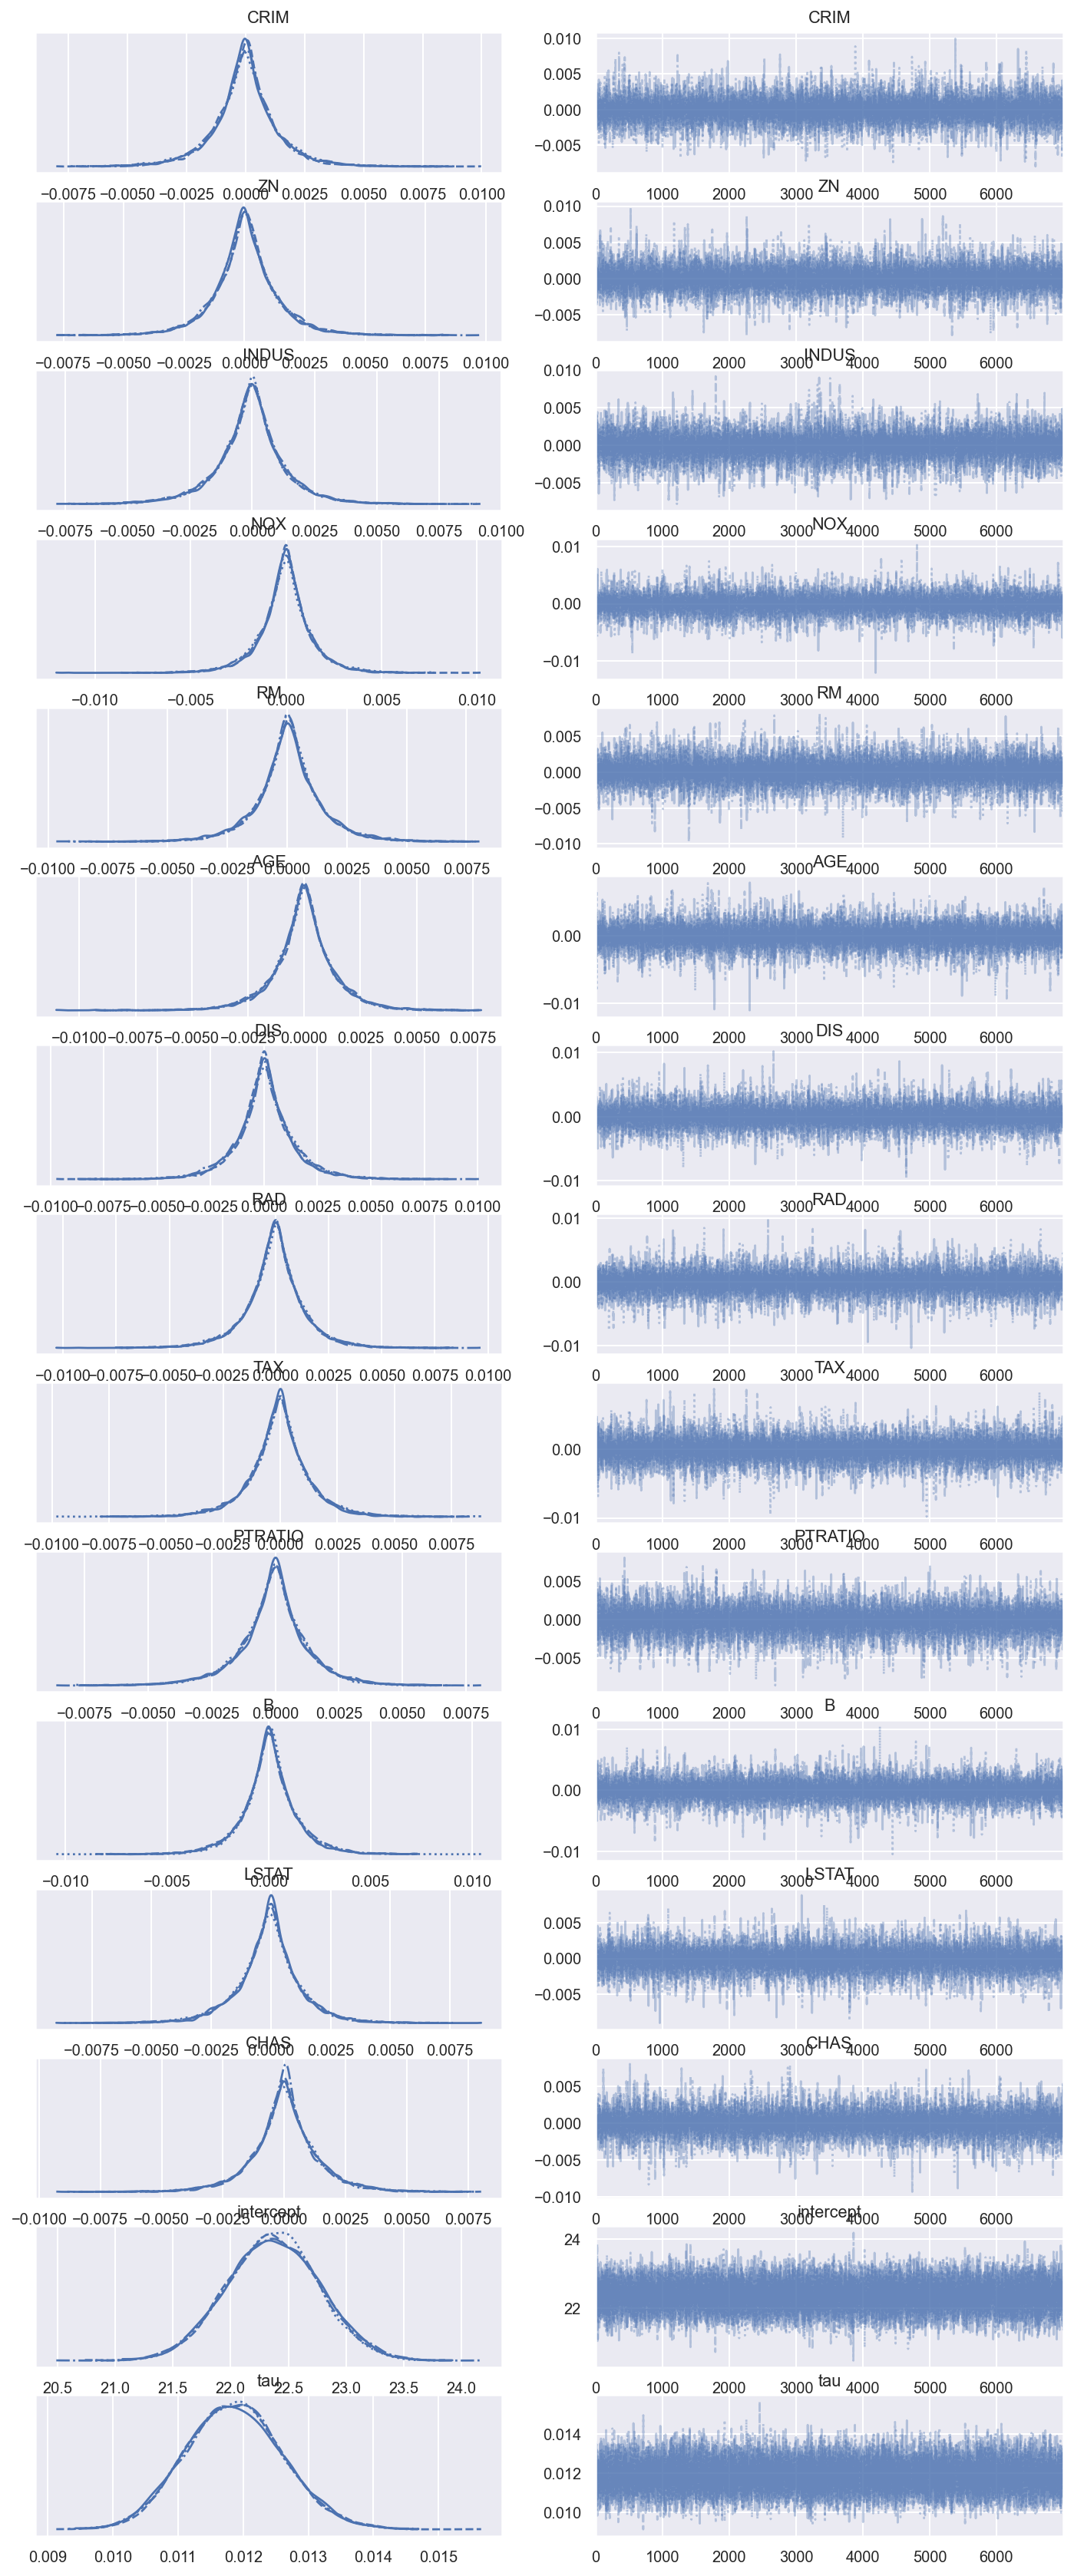

In [26]:
pm.traceplot(trace)
plt.show()

In [27]:
## b에 대한 결과를 pm.summary(trace)의 데이터프레임으로 만듭니다.
bayesian_laplacel_b1_mean = pd.DataFrame(bayesian_laplace_b1_df.iloc[:, 0])

In [28]:
bayesian_laplacel_b1_mean.columns = ["b1_mean"]

In [29]:
bayesian_laplace_b100_mean =  pd.DataFrame(bayesian_laplace_b100_df.iloc[:, 0])

In [30]:
bayesian_laplace_b100_mean.columns = ["b100_mean"]

In [31]:
bayesian_laplace_b0001_mean = pd.DataFrame(bayesian_laplace_b0001_df.iloc[:, 0])

In [32]:
bayesian_laplace_b0001_mean.columns = ["b0001_mean"]

In [33]:
## 데이터 프레임을 붙입니다.
bayesian_laplace_mean_set_df = pd.concat([bayesian_laplace_b100_mean, bayesian_laplacel_b1_mean, bayesian_laplace_b0001_mean], axis = 1)

In [34]:
df_lasso_alpha = df_lasso.iloc[:,[0,2,4]]

In [35]:
bayesian_laplace_mean_com_df = pd.merge(bayesian_laplace_mean_set_df, df_lasso_alpha, left_index=True, right_index=True,how = "left")

In [36]:
## 최종 답안 ##

## 과제 : 사전분포를 라플라스 분포로 하였을 때 어느 부분에서 라쏘가 일어나는가

## 결론

## 사전분포를 라플라스로 하였을 때 (평균이 0) b가 클 수록 규제가 덜 일어난다, 즉 라플라스 분포의 분산이 클 수록 규제가 덜 일어나는 것 (alpha, lamda가 작음)을 확인하였음

## 사전분포를 라플라스로 하였을 때 (평균이 0) b가 작을 수록 규제가 많이 일어난다, 즉 라플라스 분포의 분산이 작을수록 규제가 크게 일어나는 것 (alpha, lamda가 큼)을 확인하였음


bayesian_laplace_mean_com_df.round(3)

b100_mean  b1_mean  b0001_mean   0.001     0.1    10.0
CRIM          -0.928   -0.810      -0.000  -0.926  -0.654  -0.000
ZN             1.081    0.900       0.000   1.077   0.708   0.000
INDUS          0.138   -0.050      -0.000   0.132  -0.000  -0.000
NOX           -2.056   -1.775      -0.000  -2.048  -1.527  -0.000
RM             2.675    2.743       0.000   2.676   2.840   0.000
AGE            0.020   -0.024      -0.000   0.015  -0.000  -0.000
DIS           -3.100   -2.852       0.000  -3.100  -2.454   0.000
RAD            2.653    1.982      -0.000   2.645   1.259  -0.000
TAX           -2.068   -1.470      -0.000  -2.060  -0.915  -0.000
PTRATIO       -2.062   -1.999      -0.000  -2.059  -1.954  -0.000
B              0.848    0.817       0.000   0.849   0.780   0.000
LSTAT         -3.739   -3.723      -0.000  -3.742  -3.744  -0.000
CHAS           2.726    2.183       0.000   2.676   1.363   0.000
intercept     22.301   22.335      22.367  22.348  22.439  22.533
tau            0.045    0.044       0.012     NaN     NaN     NaN